In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import random
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit

# Entry Example

## Case where I win

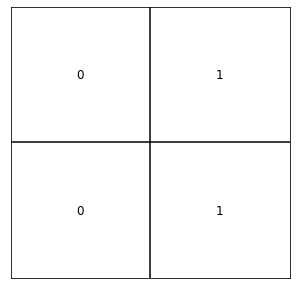

In [2]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)

# Draw a 2x2 grid
ax.plot([1, 1], [0, 2], color='black')  # Vertical line
ax.plot([0, 2], [1, 1], color='black')  # Horizontal line

# Bottom left
ax.text(0.5, 0.5, '0', ha='center', va='center', fontsize=12)
# Bottom right
ax.text(1.5, 0.5, '1', ha='center', va='center', fontsize=12)
# Top left
ax.text(0.5, 1.5, '0', ha='center', va='center', fontsize=12)
# Top right
ax.text(1.5, 1.5, '1', ha='center', va='center', fontsize=12)

# Removing the axis ticks and labels for clarity
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

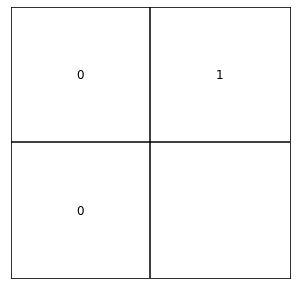

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
# Setting the x and y axis limits to match our grid size
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)

# Drawing lines to form a 2x2 grid
ax.plot([1, 1], [0, 2], color='black')  # Vertical line
ax.plot([0, 2], [1, 1], color='black')  # Horizontal line

# Annotating each cell with its coordinates
# Bottom left cell
ax.text(0.5, 0.5, '0', ha='center', va='center', fontsize=12)
# Bottom right cell
ax.text(1.5, 0.5, '', ha='center', va='center', fontsize=12)
# Top left cell
ax.text(0.5, 1.5, '0', ha='center', va='center', fontsize=12)
# Top right cell
ax.text(1.5, 1.5, '1', ha='center', va='center', fontsize=12)

# Removing the axis ticks and labels for clarity
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

## Case where I lose

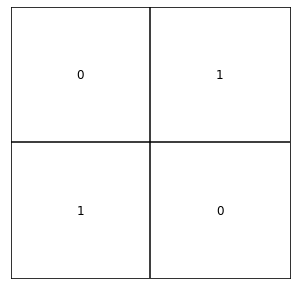

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)


ax.plot([1, 1], [0, 2], color='black')  
ax.plot([0, 2], [1, 1], color='black')  

ax.text(0.5, 0.5, '1', ha='center', va='center', fontsize=12)
ax.text(1.5, 0.5, '0', ha='center', va='center', fontsize=12)
ax.text(0.5, 1.5, '0', ha='center', va='center', fontsize=12)
ax.text(1.5, 1.5, '1', ha='center', va='center', fontsize=12)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

# Simulation

## I start first (player 0)

In [22]:
def simulate_game(grid_size):
    # Initialize an n x n grid with NaN to indicate empty cells
    grid = np.full((grid_size, grid_size), np.nan)
    
    # List of all possible positions to place "0" or "1"
    available_positions = [(i, j) for i in range(grid_size) for j in range(grid_size)]
    
    # Alternate turns between player 0 and player 1 until grid is full
    player = 0  
    while available_positions:
        position = random.choice(available_positions)
        grid[position] = player
        # Remove the chosen position from the list of available positions
        available_positions.remove(position)
        # Switch player
        player = 1 - player
    
    # Replace NaN with actual numbers for determinant calculation
    grid[np.isnan(grid)] = player
    det = np.linalg.det(grid)
    
    # Check if the determinant is 0 or not
    return det == 0

def run_simulations(num_simulations=10):
    wins = {0: 0, 1: 0}
    detailed_results = []
    for _ in range(num_simulations):
        grid_size = random.randint(2, 60)
        win = simulate_game(grid_size)
        if win:
            wins[0] += 1  
            result = "0 wins"
        else:
            wins[1] += 1 
            result = "1 wins"
        detailed_results.append(f"For n = {grid_size}, {result}.")
    return wins, detailed_results

simulation_outcomes, detailed_results = run_simulations()
print(f"Simulation Results: {simulation_outcomes}")
for result in detailed_results:
    print(result)


Simulation Results: {0: 0, 1: 10}
For n = 34, 1 wins.
For n = 34, 1 wins.
For n = 38, 1 wins.
For n = 13, 1 wins.
For n = 15, 1 wins.
For n = 29, 1 wins.
For n = 32, 1 wins.
For n = 56, 1 wins.
For n = 24, 1 wins.
For n = 39, 1 wins.


## My friend starts first (player 1)

In [89]:
def simulate_game(grid_size):
    # Initialize an n x n grid with NaN to indicate empty cells
    grid = np.full((grid_size, grid_size), np.nan)
    
    # List of all possible positions to place "0" or "1"
    available_positions = [(i, j) for i in range(grid_size) for j in range(grid_size)]
    
    # Alternate turns between player 0 and player 1 until grid is full
    player = 1  
    while available_positions:
        position = random.choice(available_positions)
        grid[position] = player
        # Remove the chosen position from the list of available positions
        available_positions.remove(position)
        
        player = 1 - player
    
    # Replace NaN with actual numbers for determinant calculation
    grid[np.isnan(grid)] = player
    det = np.linalg.det(grid)
    
    # Check if the determinant is 0 
    return det == 0

def run_simulations(num_simulations=10):
    wins = {0: 0, 1: 0}
    detailed_results = []
    for _ in range(num_simulations):
        grid_size = random.randint(2, 20)
        win = simulate_game(grid_size)
        if win:
            wins[0] += 1 
            result = "0 wins"
        else:
            wins[1] += 1 
            result = "1 wins"
        detailed_results.append(f"For n = {grid_size}, {result}.")
    return wins, detailed_results

simulation_outcomes, detailed_results = run_simulations()
print(f"Simulation Results: {simulation_outcomes}")
for result in detailed_results:
    print(result)


Simulation Results: {0: 4, 1: 6}
For n = 9, 1 wins.
For n = 7, 0 wins.
For n = 7, 0 wins.
For n = 11, 1 wins.
For n = 8, 0 wins.
For n = 15, 1 wins.
For n = 3, 0 wins.
For n = 3, 1 wins.
For n = 18, 1 wins.
For n = 12, 1 wins.


# Analysis

## Plot the win rates of different simulation results

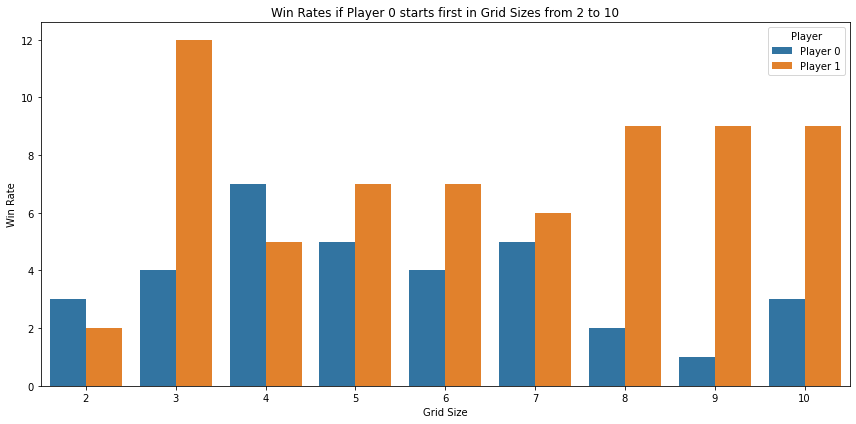

In [93]:
def run_detailed_simulations(num_simulations=100):
    wins = {0: 0, 1: 0}
    detailed_results = []
    wins_by_grid_size = {} 

    for _ in range(num_simulations):
        grid_size = random.randint(2, 10)
        win = simulate_game(grid_size)
        if win:
            wins[0] += 1
            result = "0 wins"
        else:
            wins[1] += 1
            result = "1 wins"
        
        # Update wins by grid size
        if grid_size not in wins_by_grid_size:
            wins_by_grid_size[grid_size] = {0: 0, 1: 0}
        wins_by_grid_size[grid_size][int(not win)] += 1  

        detailed_results.append(f"For n = {grid_size}, {result}.")
    
    return wins, detailed_results, wins_by_grid_size

# Run the detailed simulations
simulation_outcomes, detailed_results, wins_by_grid_size = run_detailed_simulations()

data = [] 
for grid_size, wins in wins_by_grid_size.items():
    data.append({'Grid Size': grid_size, 'Player': 'Player 0', 'Wins': wins[0]})
    data.append({'Grid Size': grid_size, 'Player': 'Player 1', 'Wins': wins[1]})

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Grid Size', y='Wins', hue='Player', data=df)
plt.title('Win Rates if Player 0 starts first in Grid Sizes from 2 to 10')
plt.xlabel('Grid Size')
plt.ylabel('Win Rate')
plt.legend(title='Player')
plt.tight_layout()
plt.show()


## Draw Line Plots

In [96]:
def run_simulation_for_line_plot(num_simulations=10):
    game_counts = {}  # Track the number of games for each grid size
    wins = {}  # Track wins by grid size and player

    for _ in range(num_simulations):
        grid_size = random.randint(2, 10)
        win = simulate_game(grid_size)

        # Initialize tracking for a new grid size
        if grid_size not in game_counts:
            game_counts[grid_size] = 0
            wins[grid_size] = {0: 0, 1: 0}

        # Update counts
        game_counts[grid_size] += 1
        wins[grid_size][int(not win)] += 1

    # Calculate win rates
    win_rates = {size: {player: wins[size][player] / game_counts[size] for player in (0, 1)} for size in game_counts}

    return win_rates


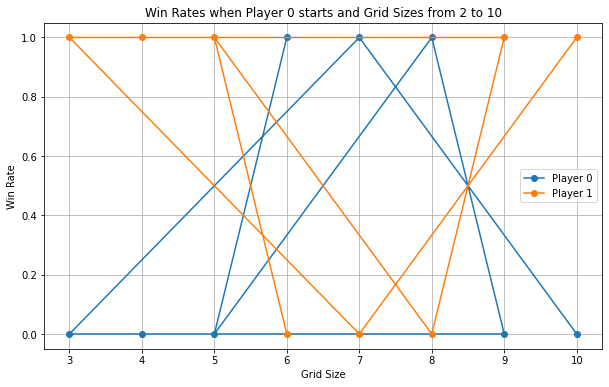

In [97]:
win_rates = run_simulation_for_line_plot()  # Assuming this returns the structure described

# Prepare data for plotting
plot_data = []
for grid_size, rates in win_rates.items():
    for player, rate in rates.items():
        plot_data.append({'Grid Size': grid_size, 'Player': f'Player {player}', 'Win Rate': rate})

# Convert to DataFrame for easier plotting
df_plot = pd.DataFrame(plot_data)

# Plot
plt.figure(figsize=(10, 6))
for player in df_plot['Player'].unique():
    subset = df_plot[df_plot['Player'] == player]
    plt.plot(subset['Grid Size'], subset['Win Rate'], marker='o', label=player)

plt.title('Win Rates when Player 0 starts and Grid Sizes from 2 to 10')
plt.xlabel('Grid Size')
plt.ylabel('Win Rate')
plt.legend()
plt.grid(True)
plt.show()


# Relationship between $n$ and win rate for each player

In [15]:
def simulate_game(grid_size):
    grid = np.full((grid_size, grid_size), np.nan)
    
    # List of all possible positions to place "0" or "1"
    available_positions = [(i, j) for i in range(grid_size) for j in range(grid_size)]
    
    # Alternate turns between player 0 and player 1 until grid is full
    player = 0  
    while available_positions:
        position = random.choice(available_positions)
        grid[position] = player
        # Remove the chosen position from the list of available positions
        available_positions.remove(position)
        
        # Switch player for next turn
        player = 1 - player
    
    # Replace NaN with actual numbers for determinant calculation
    grid[np.isnan(grid)] = player
    det = np.linalg.det(grid)
    
    # Check if the determinant is 0 or not
    return det == 0
    

def run_simulations(num_simulations=100):
    # Dictionary to track wins and total games for each grid size
    stats = {n: {'total_games': 0, 'wins': {0: 0, 1: 0}} for n in range(2, 61)}
    
    for _ in range(num_simulations):
        grid_size = random.randint(2, 60)
        win = simulate_game(grid_size)
        stats[grid_size]['total_games'] += 1
        if win:
            stats[grid_size]['wins'][0] += 1
        else:
            stats[grid_size]['wins'][1] += 1
            
    win_rates = {n: {player: stats[n]['wins'][player] / stats[n]['total_games'] for player in [0, 1]} for n in stats}
    return win_rates

win_rates = run_simulations(num_simulations=1000)


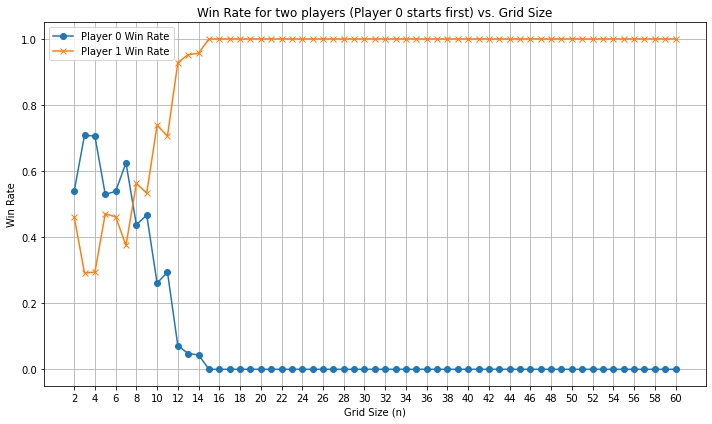

In [16]:
grid_sizes = list(win_rates.keys())
win_rates_p0 = [win_rates[n][0] for n in grid_sizes]
win_rates_p1 = [win_rates[n][1] for n in grid_sizes]

plt.figure(figsize=(10, 6))

plt.plot(grid_sizes, win_rates_p0, label='Player 0 Win Rate', marker='o')
plt.plot(grid_sizes, win_rates_p1, label='Player 1 Win Rate', marker='x')

plt.title('Win Rate for two players (Player 0 starts first) vs. Grid Size')
plt.xlabel('Grid Size (n)')
plt.ylabel('Win Rate')
plt.xticks(range(2, 61, 2))  # Adjust ticks to match your grid size range and readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


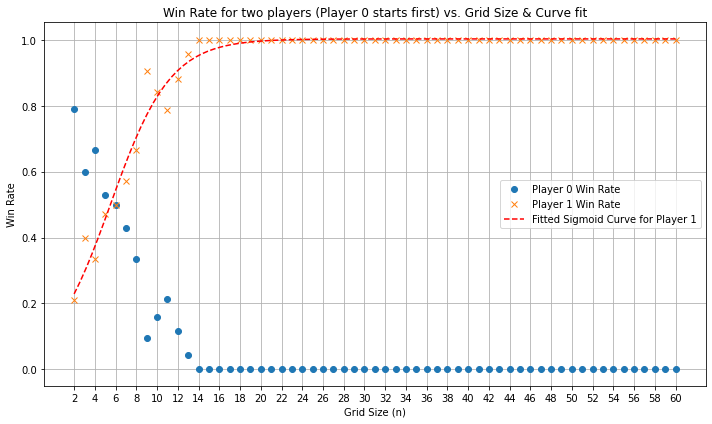

In [17]:
# Define the sigmoid function
def sigmoid(x, L, x0, k):
    y = L / (1 + np.exp(-k * (x - x0)))
    return y

def simulate_game(grid_size):
    grid = np.full((grid_size, grid_size), np.nan)
    
    # List of all possible positions to place "0" or "1"
    available_positions = [(i, j) for i in range(grid_size) for j in range(grid_size)]
    
    # Alternate turns between player 0 and player 1 until grid is full
    player = 0  
    while available_positions:
        position = random.choice(available_positions)
        grid[position] = player
        # Remove the chosen position from the list of available positions
        available_positions.remove(position)
        
        # Switch player for next turn
        player = 1 - player
    
    # Replace NaN with actual numbers for determinant calculation
    grid[np.isnan(grid)] = player
    det = np.linalg.det(grid)
    
    # Check if the determinant is 0 or not
    return det == 0

def run_simulations(num_simulations=100):
    # Dictionary to track wins and total games for each grid size
    stats = {n: {'total_games': 0, 'wins': {0: 0, 1: 0}} for n in range(2, 61)}
    
    for _ in range(num_simulations):
        grid_size = random.randint(2, 60)
        win = simulate_game(grid_size)
        stats[grid_size]['total_games'] += 1
        if win:
            stats[grid_size]['wins'][0] += 1
        else:
            stats[grid_size]['wins'][1] += 1
            
    win_rates = {n: {player: stats[n]['wins'][player] / stats[n]['total_games'] for player in [0, 1]} for n in stats}
    return win_rates

# Run simulations and plot results
win_rates = run_simulations(num_simulations=1000)
grid_sizes = np.array(sorted(win_rates.keys()))
win_rates_p0 = np.array([win_rates[n][0] for n in grid_sizes])
win_rates_p1 = np.array([win_rates[n][1] for n in grid_sizes])

# Fit the sigmoid function to the win rate data for Player 1
p0 = [max(win_rates_p1), np.median(grid_sizes), 1]
popt, pcov = curve_fit(sigmoid, grid_sizes, win_rates_p1, p0, method='dogbox')

# Plot the original win rates
plt.figure(figsize=(10, 6))
plt.plot(grid_sizes, win_rates_p0, 'o', label='Player 0 Win Rate')
plt.plot(grid_sizes, win_rates_p1, 'x', label='Player 1 Win Rate')

# Plot the fitted sigmoid curve for Player 1
x_values = np.linspace(min(grid_sizes), max(grid_sizes), 100)
y_values = sigmoid(x_values, *popt)
plt.plot(x_values, y_values, 'r--', label='Fitted Sigmoid Curve for Player 1')

plt.title('Win Rate for two players (Player 0 starts first) vs. Grid Size & Curve fit')
plt.xlabel('Grid Size (n)')
plt.ylabel('Win Rate')
plt.xticks(range(2, max(grid_sizes)+1, 2))  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Check the case where $n = 3$

In [103]:
from itertools import combinations

total_arrangements = 0
zero_determinant_count = 0

# Generate all combinations for placing 4 '1's in a 3x3 matrix
for ones_positions in combinations(range(9), 4):
    matrix = np.zeros(9, dtype=int)
    for pos in ones_positions:
        matrix[pos] = 1
    matrix = matrix.reshape((3, 3))
    
    if np.linalg.det(matrix) == 0:
        zero_determinant_count += 1
    total_arrangements += 1

probability = zero_determinant_count / total_arrangements
print(f"Probability: {probability}")


Probability: 0.7142857142857143


# Extension

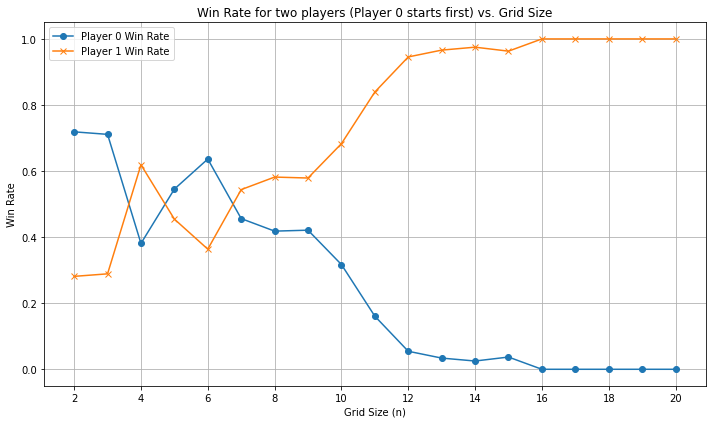

In [18]:
def simulate_game(grid_size):
    grid = np.full((grid_size, grid_size), np.nan)
    
    # List of all possible positions to place "0" or "1"
    available_positions = [(i, j) for i in range(grid_size) for j in range(grid_size)]
    
    # Alternate turns between player 0 and player 1 until grid is full
    player = 0  
    while available_positions:
        position = random.choice(available_positions)
        grid[position] = player
        # Remove the chosen position from the list of available positions
        available_positions.remove(position)
        
        player = 1 - player
    
    # Replace NaN with actual numbers for determinant calculation
    grid[np.isnan(grid)] = player
    det = np.linalg.det(grid)
    
    # Check if the determinant is 0 or not
    return det == 0
    

def run_simulations(num_simulations=100):
    # Dictionary to track wins and total games for each grid size
    stats = {n: {'total_games': 0, 'wins': {0: 0, 1: 0}} for n in range(2, 21)}
    
    for _ in range(num_simulations):
        grid_size = random.randint(2, 20)
        win = simulate_game(grid_size)
        stats[grid_size]['total_games'] += 1
        if win:
            stats[grid_size]['wins'][0] += 1
        else:
            stats[grid_size]['wins'][1] += 1
            
    win_rates = {n: {player: stats[n]['wins'][player] / stats[n]['total_games'] for player in [0, 1]} for n in stats}
    return win_rates

win_rates = run_simulations(num_simulations=1000)

grid_sizes = list(win_rates.keys())
win_rates_p0 = [win_rates[n][0] for n in grid_sizes]
win_rates_p1 = [win_rates[n][1] for n in grid_sizes]

plt.figure(figsize=(10, 6))

plt.plot(grid_sizes, win_rates_p0, label='Player 0 Win Rate', marker='o')
plt.plot(grid_sizes, win_rates_p1, label='Player 1 Win Rate', marker='x')

plt.title('Win Rate for two players (Player 0 starts first) vs. Grid Size')
plt.xlabel('Grid Size (n)')
plt.ylabel('Win Rate')
plt.xticks(range(2, 21, 2)) 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


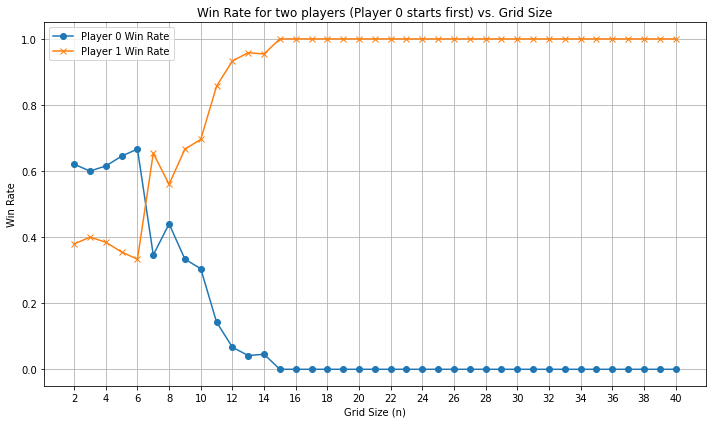

In [19]:
def simulate_game(grid_size):
    grid = np.full((grid_size, grid_size), np.nan)
    
    # List of all possible positions to place "0" or "1"
    available_positions = [(i, j) for i in range(grid_size) for j in range(grid_size)]
    
    # Alternate turns between player 0 and player 1 until grid is full
    player = 0  
    while available_positions:
        position = random.choice(available_positions)
        grid[position] = player
        # Remove the chosen position from the list of available positions
        available_positions.remove(position)
        
        # Switch player for next turn
        player = 1 - player
    
    # Replace NaN with actual numbers for determinant calculation
    grid[np.isnan(grid)] = player
    det = np.linalg.det(grid)
    
    # Check if the determinant is 0 or not
    return det == 0
    

def run_simulations(num_simulations=100):
    # Dictionary to track wins and total games for each grid size
    stats = {n: {'total_games': 0, 'wins': {0: 0, 1: 0}} for n in range(2, 41)}
    
    for _ in range(num_simulations):
        grid_size = random.randint(2, 40)
        win = simulate_game(grid_size)
        stats[grid_size]['total_games'] += 1
        if win:
            stats[grid_size]['wins'][0] += 1
        else:
            stats[grid_size]['wins'][1] += 1
            
    win_rates = {n: {player: stats[n]['wins'][player] / stats[n]['total_games'] for player in [0, 1]} for n in stats}
    return win_rates

win_rates = run_simulations(num_simulations=1000)

grid_sizes = list(win_rates.keys())
win_rates_p0 = [win_rates[n][0] for n in grid_sizes]
win_rates_p1 = [win_rates[n][1] for n in grid_sizes]

plt.figure(figsize=(10, 6))

plt.plot(grid_sizes, win_rates_p0, label='Player 0 Win Rate', marker='o')
plt.plot(grid_sizes, win_rates_p1, label='Player 1 Win Rate', marker='x')

plt.title('Win Rate for two players (Player 0 starts first) vs. Grid Size')
plt.xlabel('Grid Size (n)')
plt.ylabel('Win Rate')
plt.xticks(range(2, 41, 2))  # Adjust ticks to match your grid size range and readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
